In [ ]:
# refer
# https://github.com/ykp2/MovieLens-100K-Data-Analysis

## Exploratory Data Analysis
* Movielens-100k dataset revolves around 3 core datasets.
    - **users, movies & ratings**
* The following useful information can be found in the dataset Readme file itself.
    - Total Ratings: 100,000 ratings
    - Total Users: 943
    - Total Movies: 1,682
    - Each user has rated at least 20 movies.
    - Movies are tagged across 19 different genres:

        `unknown, Action, Adventure, Animation, Children's, Comedy, Crime, 
        Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, 
        Romance, Sci-Fi, Thriller, War, Western`
    - Ratings Scale: Explicit 1–5 star ratings.
    - Timestamp: Ratings include UNIX timestamps (seconds since 1/1/1970 UTC).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [9]:
# load data
RATINGS_DATA_PATH = './data/feature_store/ratings.csv'
USER_DATA_PATH = './data/feature_store/users.csv'
ITEM_DATA_PATH = './data/feature_store/movies.csv'

ratings_df = pd.read_csv(RATINGS_DATA_PATH)
user_df = pd.read_csv(USER_DATA_PATH)
item_df = pd.read_csv(ITEM_DATA_PATH)

### 1) EDA: Users Dataset

In [11]:
# user_df.head()
# user_df.shape
print("\nUser dataset info:")
print(user_df.info())


User dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None


In [12]:
# check missing values
print("\nMissing values in users:\n", user_df.isnull().sum())


Missing values in users:
 user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64


#### User - Age Distribution
- The majority of users are between 20-50.
- Teen, Young adult, & Adult users seem to dominate the dataset
- Right skewness of the distribution indicates unpopularity with the older user demographic.

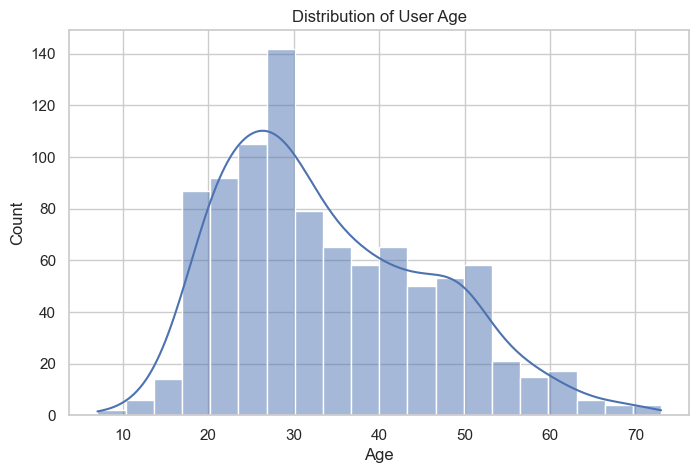

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(user_df['age'], bins=20, kde=True)
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### User - Gender Distribution
- Males have watched movies more than twice the amount of Females

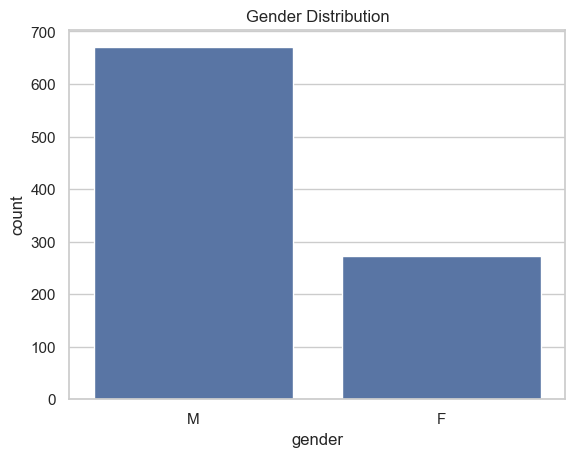

In [14]:
sns.countplot(data=user_df, x='gender')
plt.title('Gender Distribution')
plt.show()

#### User - Occupation Distribution
- Students have watched movies (which makes sense and also gets supported by the above age distribution plot), while doctors are the least.
- Top occupations include student, educator, engineer, & librarian: probably reflecting the early digital service adoption by them.

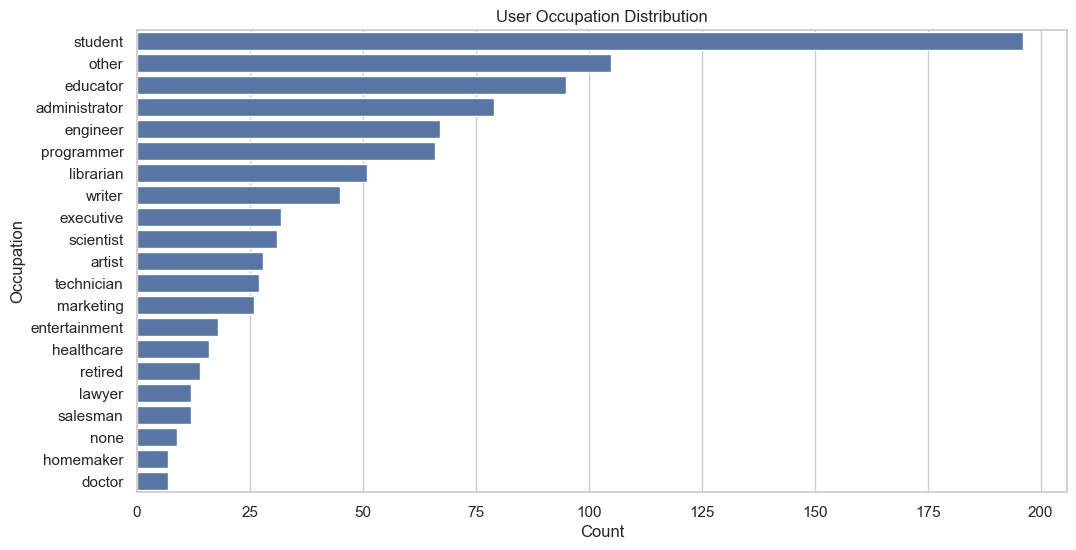

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data=user_df, y='occupation', order=user_df['occupation'].value_counts().index)
plt.title('User Occupation Distribution')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

#### User - Age by Gender
- Relatively the same

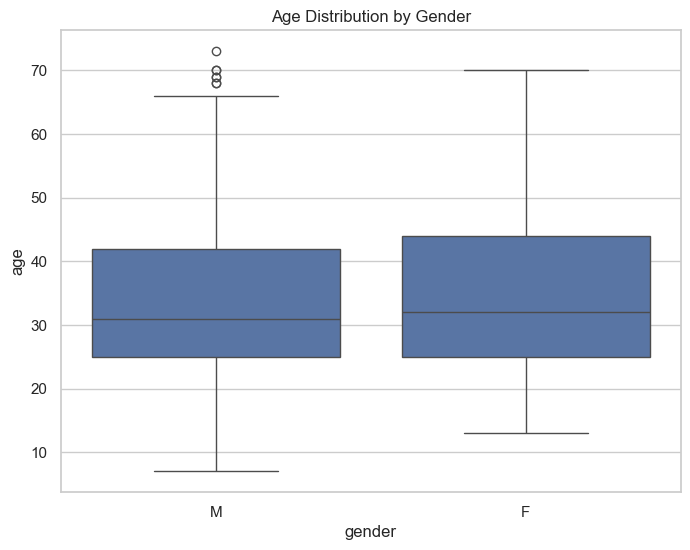

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(data=user_df, x='gender', y='age')
plt.title('Age Distribution by Gender')
plt.show()

### 2) EDA: Movies Dataset

In [17]:
# item_df.head()
# item_df.shape
print("\nMovie dataset info:")
print(item_df.info())


Movie dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null 

In [18]:
# check missing values
print("\nMissing values in users:\n", item_df.isnull().sum())

# video_release_date column is empty.
# And 1 release_date is missing


Missing values in users:
 movie_id                 0
title                    0
release_date             1
video_release_date    1682
imdb_url                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
genres                   0
year                     0
dtype: int64


#### Movies - Genre Distribution
- Drama & Comedy genre's (which are often popular) fill the majority of the movies.
- Niche genre's like Fantasy, Western etc. are recorded the least.

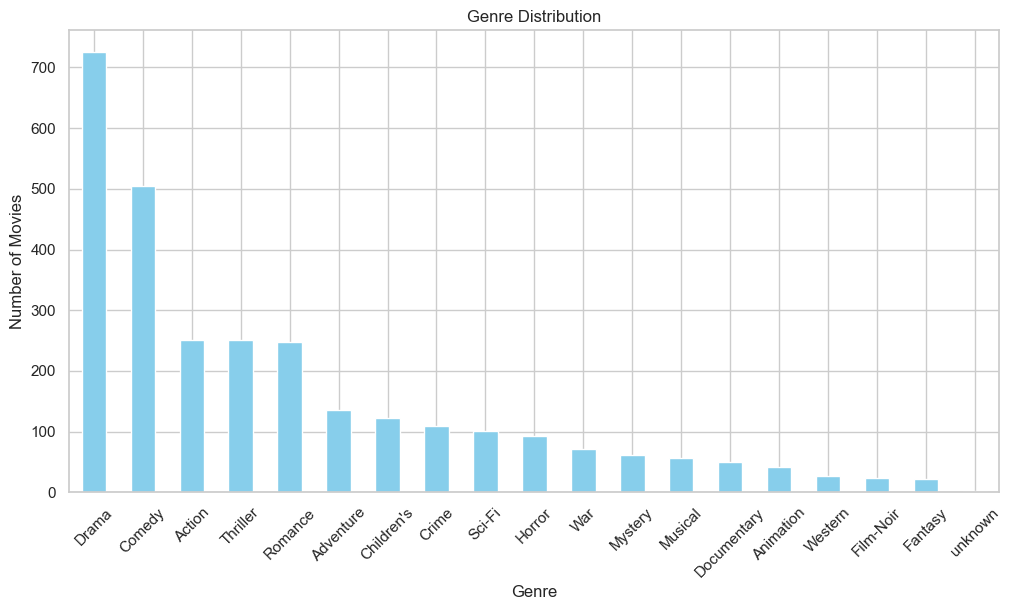

In [19]:
# Genre columns
genre_cols = ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary',
               'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
               'Thriller', 'War', 'Western']

genre_counts = item_df[genre_cols].sum()
genre_counts.index = genre_cols

plt.figure(figsize=(12,6))
genre_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


#### Movies - Number of Genres per Movie
- Almost 50% of the movie base is assigned only 1 genre
- More than 80% of the movie base are asigned either 1 or 2 genres
- Maximum movie genre assignment is 6 genres

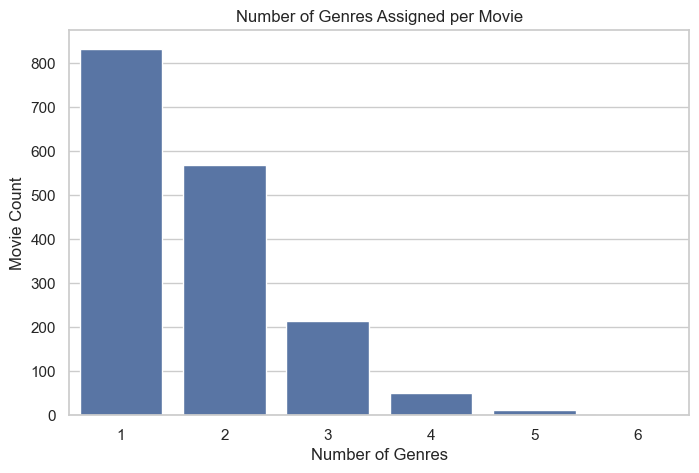

In [20]:
item_df['num_genres'] = item_df[genre_cols].sum(axis=1)

plt.figure(figsize=(8,5))
sns.countplot(x='num_genres', data=item_df)
plt.title('Number of Genres Assigned per Movie')
plt.xlabel('Number of Genres')
plt.ylabel('Movie Count')
plt.show()


#### Movies per Year
- Movie released years are heavily skewed towards 1990's

C:\Users\dgrub\AppData\Local\Temp\ipykernel_7412\1175069417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=item_df, x='release_year', palette='coolwarm',


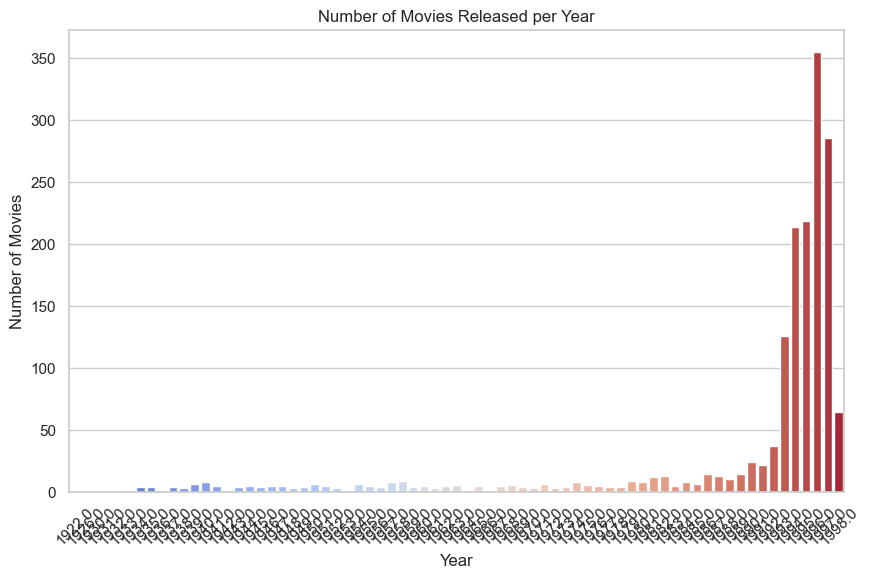

In [21]:
# Extract release year
item_df['release_year'] = pd.to_datetime(item_df['release_date'], errors='coerce').dt.year

plt.figure(figsize=(10,6))
sns.countplot(data=item_df, x='release_year', palette='coolwarm',
              order=item_df['release_year'].value_counts().sort_index().index)
plt.xticks(rotation=45)
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


#### Movies per Year (released after 1990)
- 1996 records the highest number of movie releases.
- More than 100 movies were released per year during the span of 1993-1997

C:\Users\dgrub\AppData\Local\Temp\ipykernel_7412\1209586929.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='release_year', palette='coolwarm',


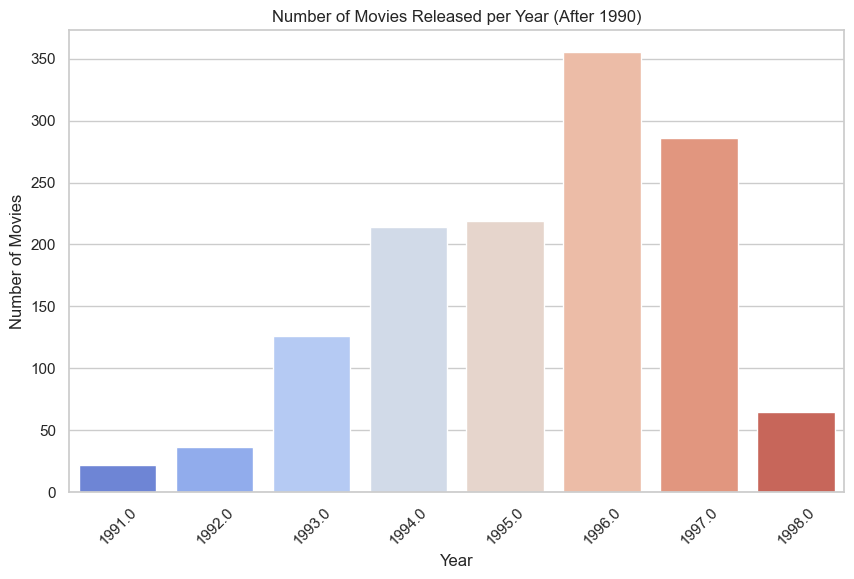

In [22]:
# Extract release year
item_df['release_year'] = pd.to_datetime(item_df['release_date'], errors='coerce').dt.year

# Filter for movies released after 1990
filtered_df = item_df[item_df['release_year'] > 1990]

plt.figure(figsize=(10,6))
sns.countplot(data=filtered_df, x='release_year', palette='coolwarm',
              order=filtered_df['release_year'].value_counts().sort_index().index)
plt.xticks(rotation=45)
plt.title('Number of Movies Released per Year (After 1990)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

### 3) EDA: Ratings Dataset
- Ratings data is merged with additional user and movie metadata

In [23]:
# ratings_df.info()
ratings_df.describe()

,user_id,age,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,32.969850,425.530130,3.529860,8.835289e+08
std,266.61442,11.562623,330.798356,1.125674,5.343856e+06
min,1.00000,7.000000,1.000000,1.000000,8.747247e+08
25%,254.00000,24.000000,175.000000,3.000000,8.794487e+08
50%,447.00000,30.000000,322.000000,4.000000,8.828269e+08
75%,682.00000,40.000000,631.000000,4.000000,8.882600e+08
max,943.00000,73.000000,1682.000000,5.000000,8.932866e+08


In [24]:
# check null values
ratings_df.isnull().sum()

user_id       0
age           0
gender        0
occupation    0
movie_id      0
title         0
genres        0
year          0
rating        0
timestamp     0
dtype: int64

#### Distribution of Ratings

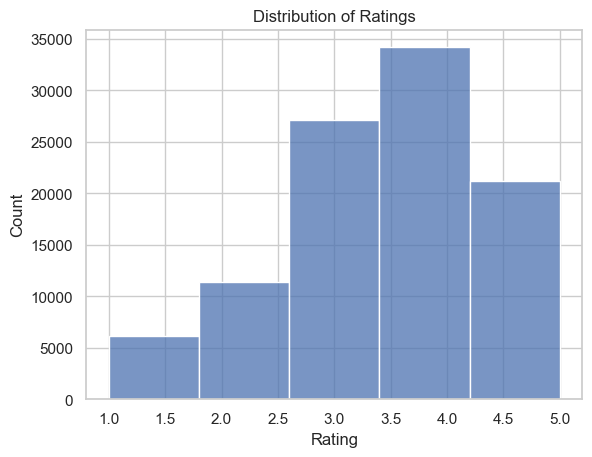

In [25]:
sns.histplot(ratings_df['rating'], bins=5, kde=False)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

#### Top 5 Highest Rated Movies

In [40]:
top_movies_all = ratings_df.groupby('title')['rating'].mean().sort_values(ascending=False).head(5)

print("Top 5 Highest Rated Movies (No Min Ratings):")
print(top_movies_all)
print("\n")

# Count ratings per movie
movie_counts = ratings_df['title'].value_counts()

# Filter for movies with at least 50 ratings
popular_movies = ratings_df[ratings_df['title'].isin(movie_counts[movie_counts >= 50].index)]

# Calculate average ratings
top_movies = popular_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(5)

print("Top 5 Highest Rated Movies (≥ 50 ratings):")
print(top_movies)

Top 5 Highest Rated Movies (No Min Ratings):
title
Aiqing wansui (1994)                                 5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
They Made Me a Criminal (1939)                       5.0
Name: rating, dtype: float64


Top 5 Highest Rated Movies (≥ 50 ratings):
title
Close Shave, A (1995)                                     4.491071
Schindler's List (1993)                                   4.466443
Wrong Trousers, The (1993)                                4.466102
Casablanca (1942)                                         4.456790
Wallace & Gromit: The Best of Aardman Animation (1996)    4.447761
Name: rating, dtype: float64


#### Top 5 Lowest Rated Movies

In [41]:
bottom_movies_all = ratings_df.groupby('title')['rating'].mean().sort_values().head(5)

print("Top 5 Lowest Rated Movies (No Min Ratings):")
print(bottom_movies_all)
print("\n")

# Calculate lowest-rated movies (again, filter to ≥ 50 ratings)
bottom_movies = popular_movies.groupby('title')['rating'].mean().sort_values().head(5)

print("Top 5 Lowest Rated Movies (≥ 50 ratings):")
print(bottom_movies)

Top 5 Lowest Rated Movies (No Min Ratings):
title
Yankee Zulu (1994)         1.0
Mighty, The (1998)         1.0
Mille bolle blu (1993)     1.0
Modern Affair, A (1995)    1.0
New Age, The (1994)        1.0
Name: rating, dtype: float64


Top 5 Lowest Rated Movies (≥ 50 ratings):
title
Island of Dr. Moreau, The (1996)        2.157895
McHale's Navy (1997)                    2.188406
Striptease (1996)                       2.238806
Beautician and the Beast, The (1997)    2.313953
Cable Guy, The (1996)                   2.339623
Name: rating, dtype: float64


#### What are the top 3 highest-rated movie genres?

In [26]:
# Assume 'genres' column contains pipe-separated genres like 'Action|Comedy'
genre_ratings = ratings_df.copy()
genre_ratings = genre_ratings.assign(genres=genre_ratings['genres'].str.split('|')).explode('genres')

top_genres = genre_ratings.groupby('genres')['rating'].mean().sort_values(ascending=False).head(3)
print("Top 3 Highest Rated Genres:\n", top_genres)

Top 3 Highest Rated Genres:
 genres
Film-Noir    3.921523
War          3.815812
Drama        3.687379
Name: rating, dtype: float64


#### What are the bottom 3 (lowest-rated) movie genres?

In [27]:
bottom_genres = genre_ratings.groupby('genres')['rating'].mean().sort_values().head(3)
print("Bottom 3 Least Rated Genres:\n", bottom_genres)

Bottom 3 Least Rated Genres:
 genres
unknown    3.200000
Fantasy    3.215237
Horror     3.290389
Name: rating, dtype: float64


#### What are the most popular genres by rating count?

In [28]:
popular_genres = genre_ratings['genres'].value_counts().head(5)
print("Top 5 Most Rated Genres:\n", popular_genres)

Top 5 Most Rated Genres:
 genres
Drama       39895
Comedy      29832
Action      25589
Thriller    21872
Romance     19461
Name: count, dtype: int64


#### What is the highest rated genre among young adults (age 18–35)?

In [29]:
young_adults = genre_ratings[(genre_ratings['age'] >= 18) & (genre_ratings['age'] <= 35)]
top_young_adult_genres = young_adults.groupby('genres')['rating'].mean().sort_values(ascending=False).head(3)
print("Top Genres Among Young Adults (18–35):\n", top_young_adult_genres)

Top Genres Among Young Adults (18–35):
 genres
Film-Noir      3.856209
War            3.773602
Documentary    3.694836
Name: rating, dtype: float64


#### Average rating by gender across genres

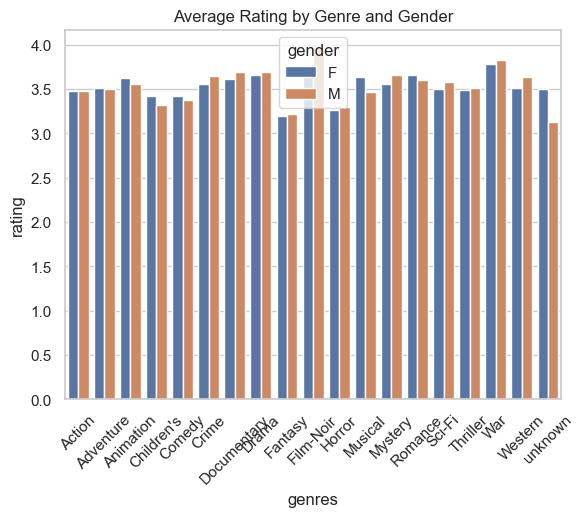

In [30]:
gender_genre_rating = genre_ratings.groupby(['gender', 'genres'])['rating'].mean().reset_index()
sns.barplot(data=gender_genre_rating, x='genres', y='rating', hue='gender')
plt.xticks(rotation=45)
plt.title('Average Rating by Genre and Gender')
plt.show()

#### Top 10 Highest Rated Movies (with ≥ 50 ratings)

In [31]:
movie_counts = ratings_df['title'].value_counts()
popular_movies = ratings_df[ratings_df['title'].isin(movie_counts[movie_counts >= 50].index)]
top_movies = popular_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print("Top 10 Highest Rated Movies (≥ 50 ratings):\n", top_movies)

Top 10 Highest Rated Movies (≥ 50 ratings):
 title
Close Shave, A (1995)                                     4.491071
Schindler's List (1993)                                   4.466443
Wrong Trousers, The (1993)                                4.466102
Casablanca (1942)                                         4.456790
Wallace & Gromit: The Best of Aardman Animation (1996)    4.447761
Shawshank Redemption, The (1994)                          4.445230
Rear Window (1954)                                        4.387560
Usual Suspects, The (1995)                                4.385768
Star Wars (1977)                                          4.358491
12 Angry Men (1957)                                       4.344000
Name: rating, dtype: float64


#### Rating Trends Over the Years

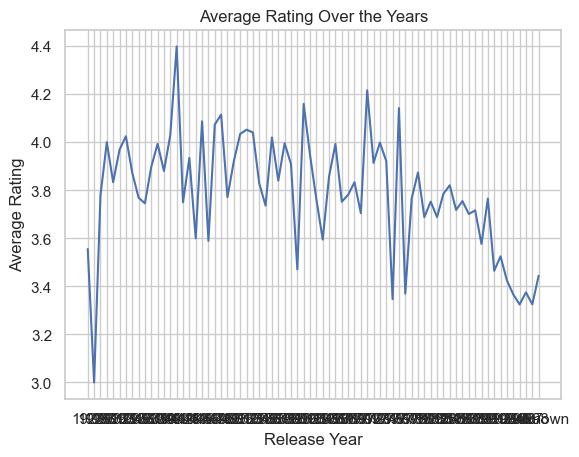

In [32]:
yearly_rating = ratings_df.groupby('year')['rating'].mean().reset_index()
sns.lineplot(data=yearly_rating, x='year', y='rating')
plt.title("Average Rating Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.show()

#### Occupation-wise Movie Preferences

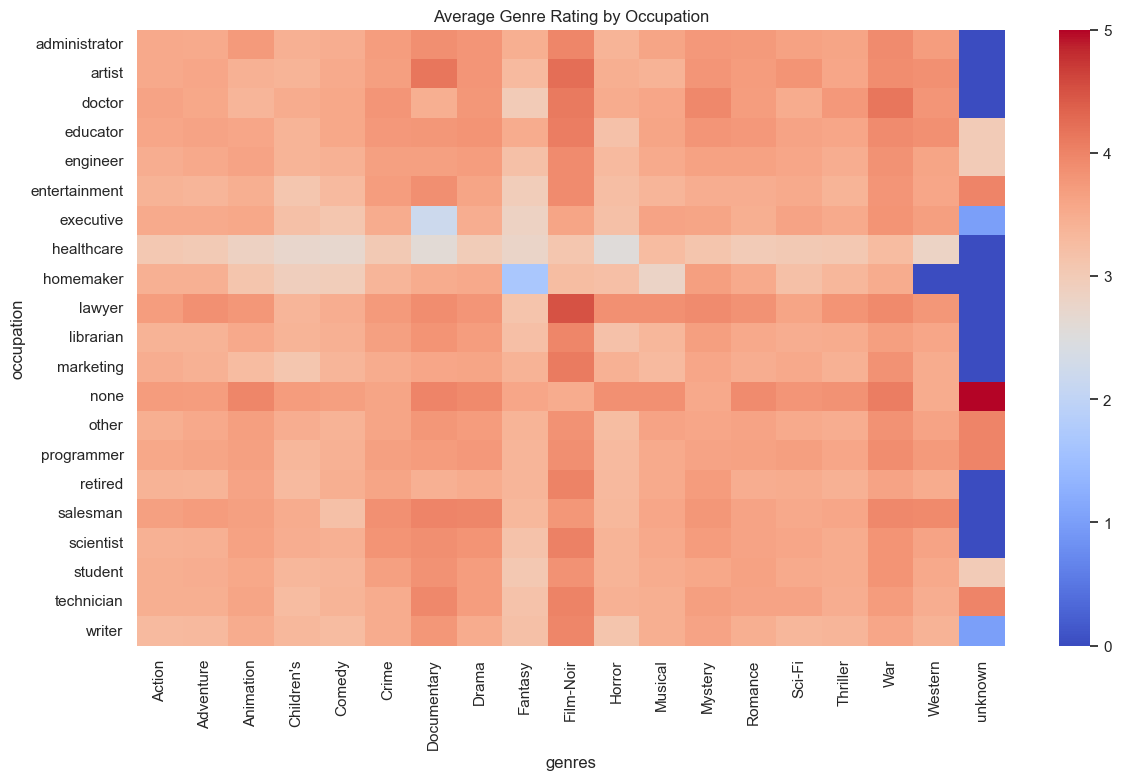

In [33]:
occupation_rating = genre_ratings.groupby(['occupation', 'genres'])['rating'].mean().reset_index()
top_occ = occupation_rating.pivot(index='occupation', columns='genres', values='rating')
top_occ = top_occ.fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(top_occ, cmap='coolwarm')
plt.title('Average Genre Rating by Occupation')
plt.show()

#### Are males or females more generous in their ratings?

gender
F    3.531507
M    3.529289
Name: rating, dtype: float64


C:\Users\dgrub\AppData\Local\Temp\ipykernel_7412\2840477691.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=ratings_df, x='gender', y='rating', estimator=np.mean, ci=None)


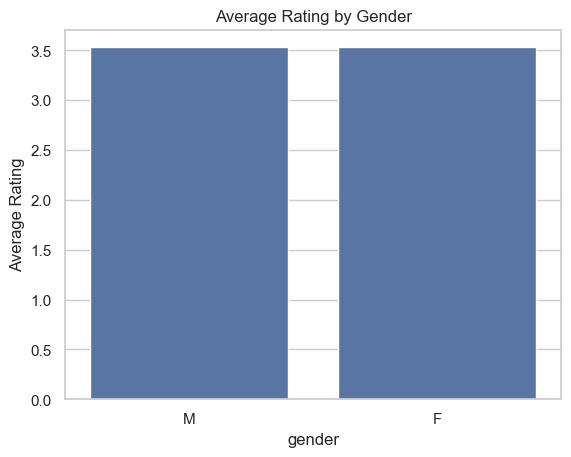

In [35]:
gender_avg_rating = ratings_df.groupby('gender')['rating'].mean()
print(gender_avg_rating)

sns.barplot(data=ratings_df, x='gender', y='rating', estimator=np.mean, ci=None)
plt.title("Average Rating by Gender")
plt.ylabel("Average Rating")
plt.show()

#### Sparsity in the User-Movie Matrix

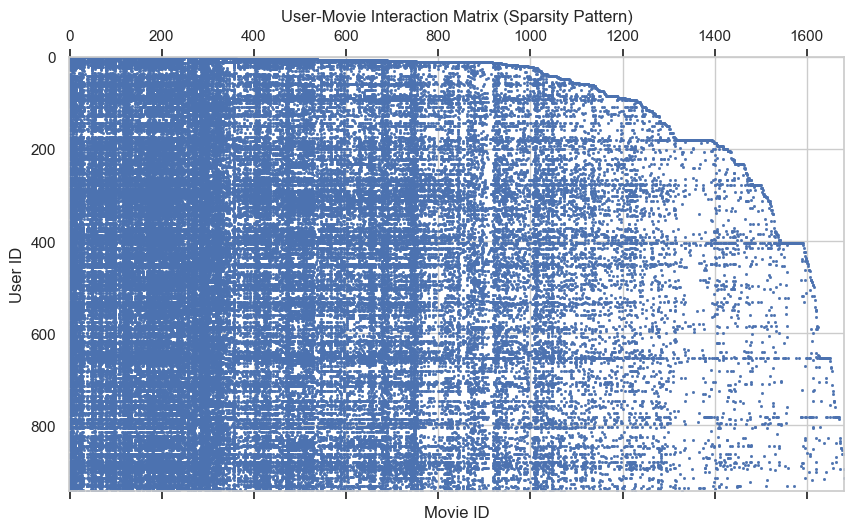

Sparsity of User-Movie Matrix: 93.70%


In [36]:
from scipy.sparse import csr_matrix

# Create interaction matrix
interaction_matrix = ratings_df.pivot_table(index='user_id', columns='movie_id', values='rating')

# Visualize sparsity
plt.figure(figsize=(10,6))
plt.spy(interaction_matrix.notna(), markersize=1)
plt.title("User-Movie Interaction Matrix (Sparsity Pattern)")
plt.xlabel("Movie ID")
plt.ylabel("User ID")
plt.show()

# Sparsity %
total_possible = interaction_matrix.shape[0] * interaction_matrix.shape[1]
total_rated = interaction_matrix.count().sum()
sparsity = 100 * (1 - total_rated / total_possible)
print(f"Sparsity of User-Movie Matrix: {sparsity:.2f}%")